In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [67]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [38]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df.shape

(42000, 785)

In [40]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12358,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import matplotlib.pyplot as plt

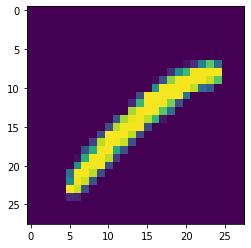

In [18]:
plt.imshow(df.iloc[30642,1:].values.reshape(28,28))

In [68]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [43]:
X_train.shape

(33600, 784)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier()

In [46]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.326303720474243


In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9660714285714286

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=100) #100,none,200

In [52]:
#X_train_pca = pca.fit_transform(X_train) #1st
#X_test_pca = pca.transform(X_test)

In [73]:
X_train_trf = pca.fit_transform(X_train) #2nd
X_test_trf = pca.transform(X_test)

In [74]:
X_train_trf.shape

(33600, 100)

In [78]:
knn = KNeighborsClassifier()

In [79]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [80]:
y_pred =  knn.predict(X_test_trf)

In [81]:
accuracy_score(y_test,y_pred)

0.9510714285714286

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier() #n_neighbors=5
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))

0.25142857142857145
0.33166666666666667
0.5082142857142857
0.664047619047619
0.7316666666666667
0.8253571428571429
0.8389285714285715
0.8666666666666667
0.8882142857142857
0.9082142857142858
0.9126190476190477
0.9205952380952381
0.9267857142857143
0.9319047619047619
0.9376190476190476
0.9371428571428572
0.9384523809523809
0.9397619047619048
0.940952380952381
0.9432142857142857
0.9435714285714286
0.9432142857142857
0.9435714285714286
0.9445238095238095
0.945
0.945952380952381
0.9461904761904761
0.9475
0.9495238095238095
0.9486904761904762
0.9488095238095238
0.9488095238095238
0.9488095238095238
0.949047619047619
0.9523809523809523
0.9528571428571428
0.9523809523809523
0.9516666666666667
0.9542857142857143
0.9530952380952381
0.9515476190476191
0.9515476190476191
0.9522619047619048
0.9523809523809523
0.9526190476190476
0.9523809523809523
0.9515476190476191
0.9521428571428572
0.9515476190476191
0.9515476190476191
0.9507142857142857
0.9510714285714286
0.9507142857142857
0.9510714285714286
0